# <font color="red">MAJOR PROJECT</font>

***

In [4]:
import cv2
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
from os import listdir
import cv2
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg

In [5]:
#from google.colab import drive
#alldrive.mount

In [6]:
import tensorflow as tf

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
data_path=(r"C:\Users\KIIT\Desktop\Verzeo Internship\Major project\Face Mask Detector\dataset")
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))
print(label_dict)
print(categories)
print(labels)


{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [9]:
#data.shape

In [10]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)

Exception: OpenCV(4.3.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



In [11]:
#data.shape

In [12]:
#target.shape

In [13]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [14]:
#import tensorflow

In [15]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import keras
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

Using TensorFlow backend.


In [17]:

#data=np.load('data.npy')
#target=np.load(target)

In [18]:
data.shape

(1376, 100, 100, 1)

In [19]:
new_target.shape

(1376, 2)

In [20]:
np.save('data',data)
np.save('target',new_target)

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [22]:
a=data.shape[1:]
a

(100, 100, 1)

In [23]:
#test_target.shape

In [24]:
#train_target.shape

In [25]:
#test_data.shape

In [26]:
#train_data.shape

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(data,new_target,test_size=0.2)

In [28]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(X_train,Y_train,epochs=10,batch_size=32,callbacks=[checkpoint],validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 880 samples, validate on 220 samples
Epoch 1/10
880/880 [==============================] - 55s 62ms/step - loss: 0.7043 - acc: 0.4909 - val_loss: 0.6911 - val_acc: 0.5500
Epoch 2/10
880/880 [==============================] - 54s 61ms/step - loss: 0.6502 - acc: 0.6159 - val_loss: 0.6404 - val_acc: 0.6227
Epoch 3/10
880/880 [==============================] - 53s 61ms/step - loss: 0.5405 - acc: 0.7261 - val_loss: 0.4391 - val_acc: 0.7227
Epoch 4/10
880/880 [==============================] - 53s 61ms/step - loss: 0.3812 - acc: 0.8443 - val_loss: 0.3288 - val_acc: 0.8909
Epoch 5/10
880/880 [==============================] - 54s 61ms/step - loss: 0.2837 - acc: 0.8920 - val_loss: 0.2885 - val_acc: 0.8636
Epoch 6/10
880/880 [==============================] - 54s 61ms/step - loss: 0.2012 - acc: 0.9261 - val_loss: 0.2108 - val_acc: 0.9136
Epoch 7/10
880/880 [==============================] - 53

In [29]:
from sklearn.metrics import classification_report
predIdxs = model.predict(X_test)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(Y_test.argmax(axis=1), predIdxs))
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save('model.h5')

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       136
           1       0.92      0.96      0.94       140

    accuracy                           0.93       276
   macro avg       0.94      0.93      0.93       276
weighted avg       0.94      0.93      0.93       276

[INFO] saving mask detector model...


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[124  12]
 [  6 134]]
acc: 0.9348
sensitivity: 0.9118
specificity: 0.9571


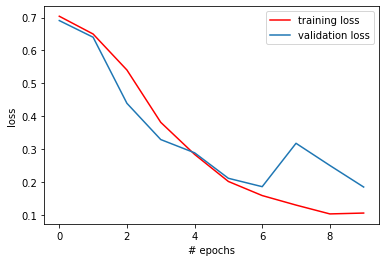

In [31]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

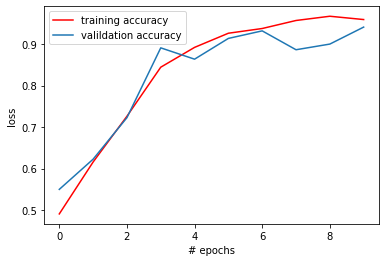

In [32]:
plt.plot(history.history['acc'],'r',label='training accuracy')
plt.plot(history.history['val_acc'],label='valildation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

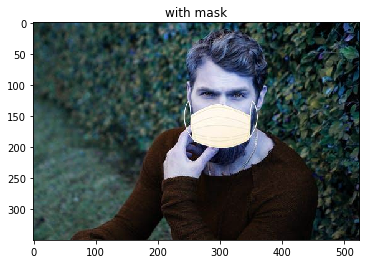

In [33]:
from keras.preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
pathtest="C:/Users/KIIT/Desktop/Verzeo Internship/Major project/Face Mask Detector/dataset/with mask/0-with-mask.jpg"
img_size=100
img=cv2.imread(pathtest)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resized=cv2.resize(gray,(img_size,img_size))
data=[]
data.append(resized)
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
results=model.predict(data)
#model_out=model.predict([test_data])
if np.argmax(results) == 1 : str_label ='without mask'
else: str_label = 'with mask'

plt.imshow(img,cmap='gray')
plt.title(str_label)
#plt.axes.get_xaxis().set_visible(False)
#plt.axes.get_yaxis().set_visible(False)
plt.imshow(img)

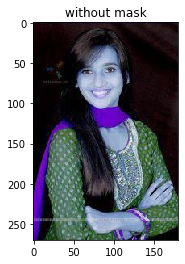

In [34]:
pathtest="C:/Users/KIIT/Desktop/Verzeo Internship/Major project/Face Mask Detector/dataset/without mask/0.jpg"
img_size=100
img=cv2.imread(pathtest)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resized=cv2.resize(gray,(img_size,img_size))
data=[]
data.append(resized)
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
results=model.predict(data)
#model_out=model.predict([test_data])
if np.argmax(results) == 1 : str_label ='without mask'
else: str_label = 'with mask'

plt.imshow(img,cmap='gray')
plt.title(str_label)
#plt.axes.get_xaxis().set_visible(False)
#plt.axes.get_yaxis().set_visible(False)
plt.imshow(img)

!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml 

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import math
import time

In [36]:
face_clsfr=cv2.CascadeClassifier('C:/Users/KIIT/Desktop/Verzeo Internship/Major project/Face Mask Detector/haar-cascade-files-master/haarcascade_frontalface_default.xml')
source=cv2.VideoCapture(0)
labels_dict={0:'with_mask',1:'without_mask'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [37]:
while(True):

    ret,im=source.read()
    gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5,0)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',im)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()


***

***

## <p style="text-align: right;">This project is made by<br><br> -<b> AI05B3</b> <br>Batch: AI May Batch<br></p>